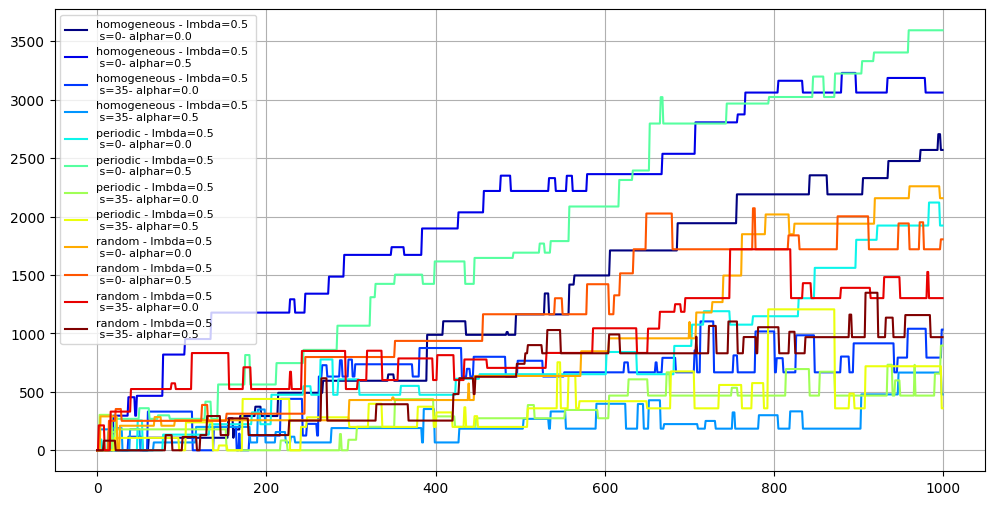

In [29]:
# Librairies
import numpy as np
import matplotlib.pyplot as plt
import polars as pl
from pathlib import Path


# Load files
root = Path("/home/nicolas/Documents/PhD/Workspace/nucleo/outputs/2025-12-11__PC/nucleo__shorttest_0")
paths = [str(p) for p in root.glob("*/**/*.parquet")] or [str(p) for p in root.glob("*/*.parquet")]
df_all = (
    pl.scan_parquet(paths)
    .collect()
    .sort(by=["landscape", "s", "l", "lmbda", "alphar"])
)


# Loop
plt.figure(figsize=(12,6))
n_rows = df_all.height
cmap = plt.cm.jet
colors = [cmap(i / max(n_rows - 1, 1)) for i in range(n_rows)]

for color, row in zip(colors, df_all.iter_rows(named=True)):
    
    results     = row["results"]
    landscape   = row["landscape"]
    lmbda       = row["lmbda"]
    alphar      = row["alphar"]
    s           = row["s"]
    
    plt.plot(results[0], color=color,
             label=f"{landscape} - lmbda={lmbda} \n s={s}- alphar={alphar}")

plt.legend(fontsize=8)
plt.grid(True)
plt.show()

# .